In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize
from sklearn.linear_model import LinearRegression
import pymc3 as pm

In [2]:
plt.style.use('seaborn-darkgrid')
np.random.seed(123)

In [3]:
def gen_data(n_samples=30, max_x = 10, m=2, b=0, error_scale=1.5):
    X = np.random.random(n_samples) * max_x
    e = np.random.randn(n_samples) * error_scale
    y = m * X + b + e
    return X.reshape(-1,1), y.reshape(-1,1)

In [4]:
X, y = gen_data(n_samples=20)

[-1, 12, -1, 23]

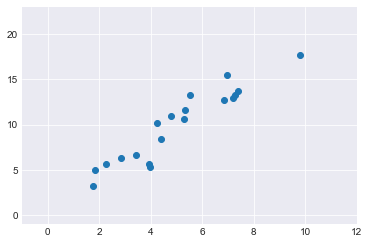

In [5]:
plt.scatter(X,y)
plt.axis([-1,12,-1,23])

In [6]:
lm = LinearRegression()
lm.fit(X,y)
print(lm.coef_,lm.intercept_)

[[1.98582837]] [-0.20499631]


[-1, 12, -1, 24]

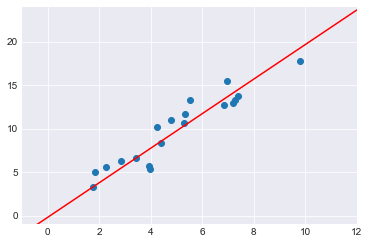

In [7]:
X_test = np.linspace(-1,12).reshape(-1,1)
y_pred = lm.predict(X_test)
plt.scatter(X,y)
plt.plot(X_test,y_pred, color='red')
plt.axis([-1,12,-1,24])

In [8]:
model = pm.Model()

with model:
#   b = pm.Normal('b', mu=0, sd=10)
    b = pm.Uniform('b', -10,10)
    m = pm.Uniform('m', 0, 20)
    sigma = pm.HalfNormal('sigma', sd=1)
    
    line = m*X + b
    
    Y_obs = pm.Normal('Y_obs', mu=line, sd=sigma, observed=y)

In [9]:
with model:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, m, b]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1869.94draws/s]
The acceptance probability does not match the target. It is 0.8898549342633241, but should be close to 0.8. Try to increase the number of tuning steps.


In [10]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
b,-0.200971,0.879144,0.022119,-1.976930,1.547672,1389.221266,1.002087
m,1.982702,0.167229,0.004135,1.664187,2.315431,1379.603985,1.002101
sigma,1.694331,0.247522,0.005295,1.239713,2.182106,1784.356319,0.999652


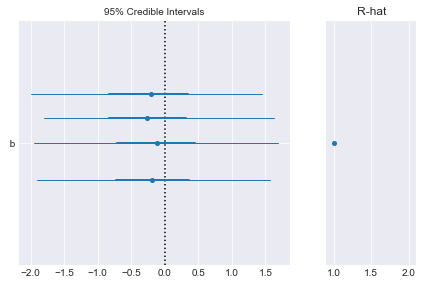

In [11]:
pm.forestplot(trace, varnames=['b']);

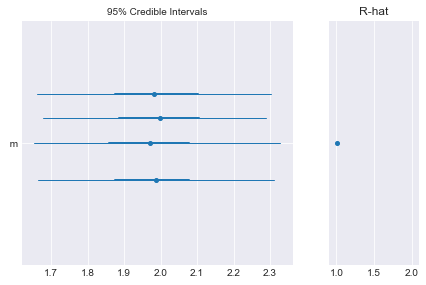

In [12]:
pm.forestplot(trace, varnames=['m']);

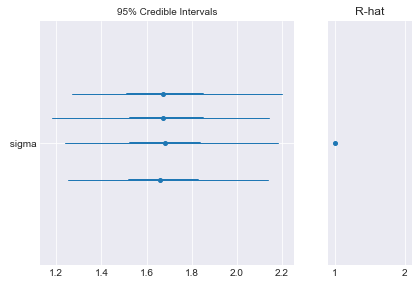

In [13]:
pm.forestplot(trace, varnames=['sigma']);

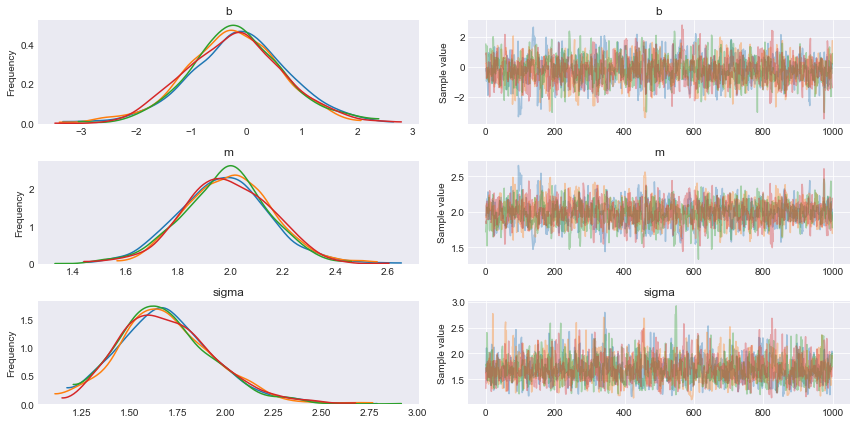

In [14]:
_ = pm.traceplot(trace)